<a href="https://colab.research.google.com/github/maedeamooshahi/datamining-1/blob/main/stack_overflow_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
answer=pd.read_csv('Answers.csv')
question=pd.read_csv('Questions.csv')

In [ ]:
answer.head(3)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN


In [ ]:
question.head()

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...


In [ ]:
dict_miss_value={
    'answer':answer.isnull().sum().sum(),
    'question':question.isnull().sum().sum()
}
dict_miss_value

{'answer': 908664, 'question': 0}

In [ ]:
len(answer)*len(answer.columns)

3932121

questions are done but answers have many missing values 

In [ ]:
answer.describe().T

,count,mean,std,min,25%,50%,75%,max
Respondent,64461.0,3.255408e+04,1.896744e+04,1.0,16116.0,32231.0,49142.0,6.563900e+04
Age,45446.0,3.083411e+01,9.585392e+00,1.0,24.0,29.0,35.0,2.790000e+02
CompTotal,34826.0,3.190464e+242,inf,0.0,20000.0,63000.0,125000.0,1.111111e+247
ConvertedComp,34756.0,1.037561e+05,2.268853e+05,0.0,24648.0,54049.0,95000.0,2.000000e+06
WorkWeekHrs,41151.0,4.078217e+01,1.781638e+01,1.0,40.0,40.0,44.0,4.750000e+02


also we can see it have some outliers

In [ ]:
missing_probability=answer.isnull().sum()/len(answer)
pd.DataFrame(missing_probability).T

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,0.0,0.004638,0.000698,0.294985,0.101782,0.378399,0.459735,0.460821,0.006035,0.294581,...,0.196382,0.197949,0.234498,0.208902,0.379097,0.344115,0.182715,0.361614,0.105133,0.280976


#### we can have three behaiviors with missing values 

1. drop them
2. fill them by bffil or ffil
3. fill them with imputers such as kNN or simple imputer

## drop part :

In [ ]:
def miss_percent_limit(ds):
    list_qualify=[]
    for idx,el in enumerate(ds[0]):
        if el<=0.3:
            list_qualify.append(ds.iloc[idx]['index'])
    return list_qualify

In [ ]:
list_non_drop=miss_percent_limit(missing_probability.reset_index())
answer=answer[list_non_drop]
answer.head(3)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,Country,CurrencyDesc,CurrencySymbol,DatabaseWorkedWith,DevType,...,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WelcomeChange,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Germany,European Euro,EUR,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...",...,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",Just as welcome now as I felt last year,36,27
1,2,I am a developer by profession,No,NaN,19,United Kingdom,Pound sterling,GBP,NaN,"Developer, full-stack;Developer, mobile",...,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",Somewhat more welcome now than last year,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,Russian Federation,NaN,NaN,NaN,NaN,...,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,Somewhat more welcome now than last year,4,NaN


## imputer:

In [ ]:
from sklearn.impute import KNNImputer
imputer=KNNImputer()
answer['Age']=imputer.fit_transform(answer[['Age']])

## bfill part :

In [ ]:
answer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           64461 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   Country                       64072 non-null  object 
 6   CurrencyDesc                  45472 non-null  object 
 7   CurrencySymbol                45472 non-null  object 
 8   DatabaseWorkedWith            49537 non-null  object 
 9   DevType                       49370 non-null  object 
 10  EdLevel                       57431 non-null  object 
 11  Employment                    63854 non-null  object 
 12  Ethnicity                     45948 non-null  object 
 13  G

In [ ]:
for i in answer.columns:
    try:
        answer[i]=answer.astype(float)
    except ValueError:
        continue

In [ ]:
answer.fillna(method='bfill',inplace=True)
answer.fillna(method='ffill',inplace=True)

In [ ]:
answer.isnull().sum().sum()

0

In [ ]:
list_encode=[]
for i in answer.columns:
    if len(pd.unique(answer[i]))<10:
        list_encode.append(i)
list_encode

['MainBranch',
 'Hobbyist',
 'EdLevel',
 'Employment',
 'Gender',
 'JobSat',
 'JobSeek',
 'NEWEdImpt',
 'NEWLearn',
 'NEWOffTopic',
 'NEWOtherComms',
 'NEWPurpleLink',
 'OpSys',
 'SOAccount',
 'SOComm',
 'SOPartFreq',
 'SOVisitFreq',
 'SurveyEase',
 'SurveyLength',
 'Trans',
 'WelcomeChange']

In [ ]:
set(answer['Gender'])

{'Man',
 'Man;Non-binary, genderqueer, or gender non-conforming',
 'Non-binary, genderqueer, or gender non-conforming',
 'Woman',
 'Woman;Man',
 'Woman;Man;Non-binary, genderqueer, or gender non-conforming',
 'Woman;Non-binary, genderqueer, or gender non-conforming'}

In [ ]:
gender_binary=[]
for i in (answer['Gender']):
    if 'Woman' in i:
        gender_binary.append(1)
    else:
        gender_binary.append(0)
answer['Gender']=gender_binary
del gender_binary

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
dict_encoder={}
for i in list_encode:
    encoder=OrdinalEncoder()
    answer[i]=encoder.fit_transform(answer[[i]])
    dict_encoder[i]=encoder

In [ ]:
import seaborn as sns

C:\Users\vai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


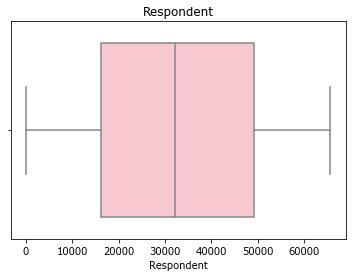

C:\Users\vai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


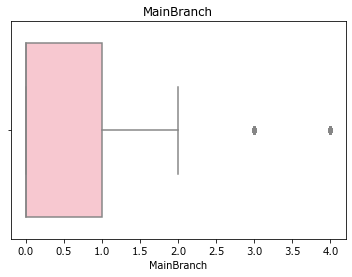

C:\Users\vai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


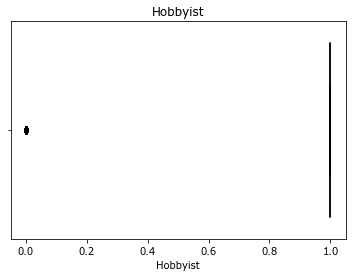

C:\Users\vai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


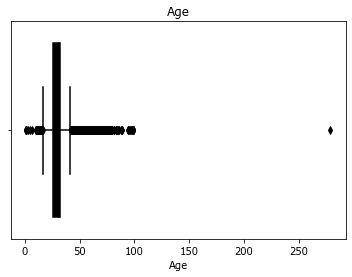

C:\Users\vai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vai\anaconda3\lib\site-packa

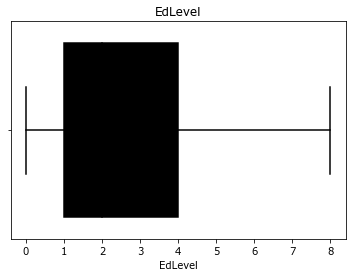

C:\Users\vai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


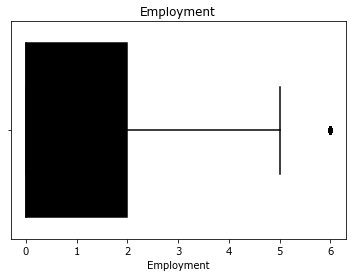

C:\Users\vai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


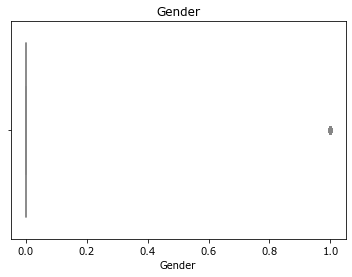

C:\Users\vai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


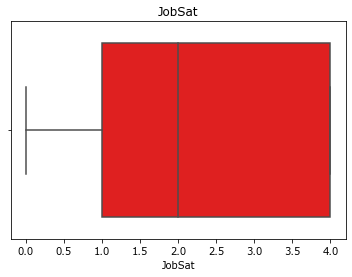

C:\Users\vai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


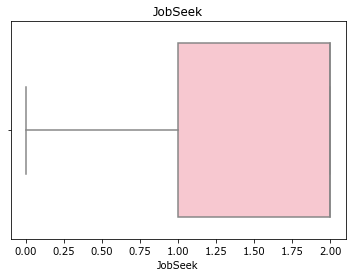

C:\Users\vai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vai\anaconda3\lib\site-packa

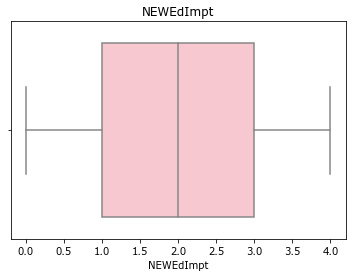

C:\Users\vai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


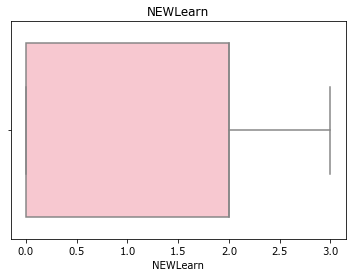

C:\Users\vai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


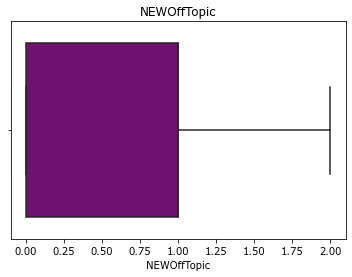

C:\Users\vai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


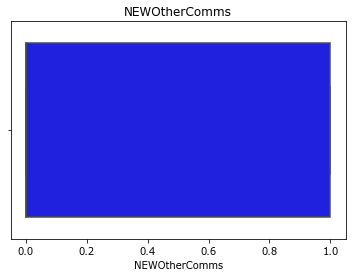

C:\Users\vai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


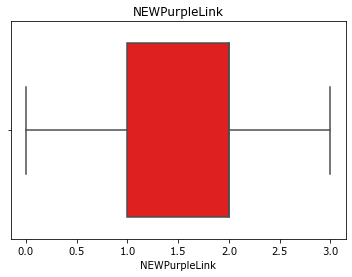

C:\Users\vai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


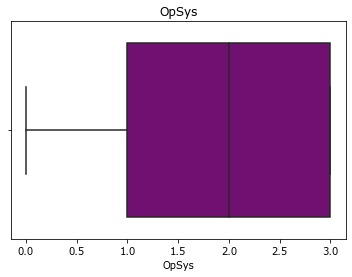

C:\Users\vai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


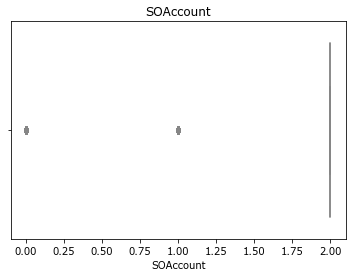

C:\Users\vai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


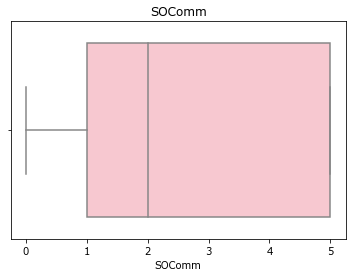

C:\Users\vai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


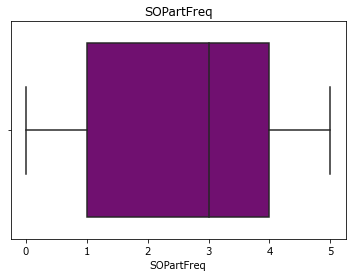

C:\Users\vai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


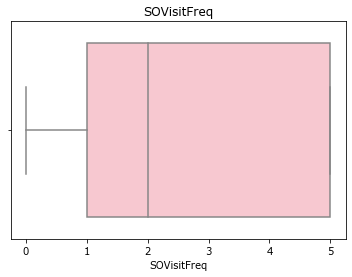

C:\Users\vai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


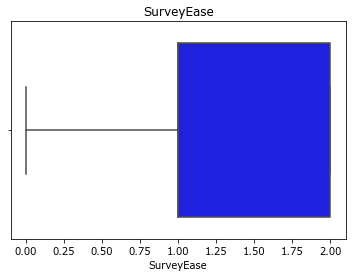

C:\Users\vai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


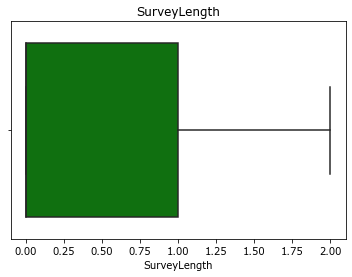

C:\Users\vai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


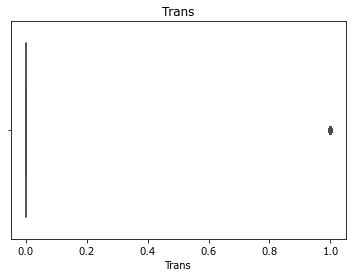

C:\Users\vai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


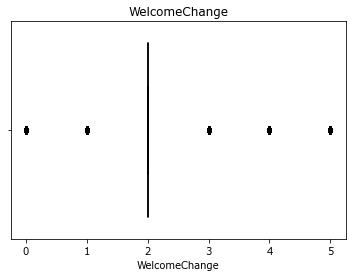

C:\Users\vai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [ ]:
from random import choice
colors=['red','blue','green','black','pink','purple']
for i in answer.columns:
    try:
        sns.boxplot(answer[i],color=choice(colors))
        plt.title(i)
        plt.show()
    except TypeError:
        continue

##### some features are imbalance 

##### we can use imblearn (oversamplin-undersampling) to balance them nut its out off this project

##### age have the most outliers so lets handle this feature for example

In [ ]:
def outlier_finder(df):
    index_list=[]
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    iqr=q3-q1
    higher_bound=q3+1.5*iqr
    lower_bound=q1-1.5*iqr
    index_list.extend((df[(df<lower_bound) | (df>higher_bound)]).index)
    return index_list

In [ ]:
outliers_index=outlier_finder(answer['Age'])

In [ ]:
outliers_index[:5]

[11, 12, 15, 23, 34]

In [ ]:
answer.drop(outliers_index,inplace=True)

## correlation :

<AxesSubplot:>

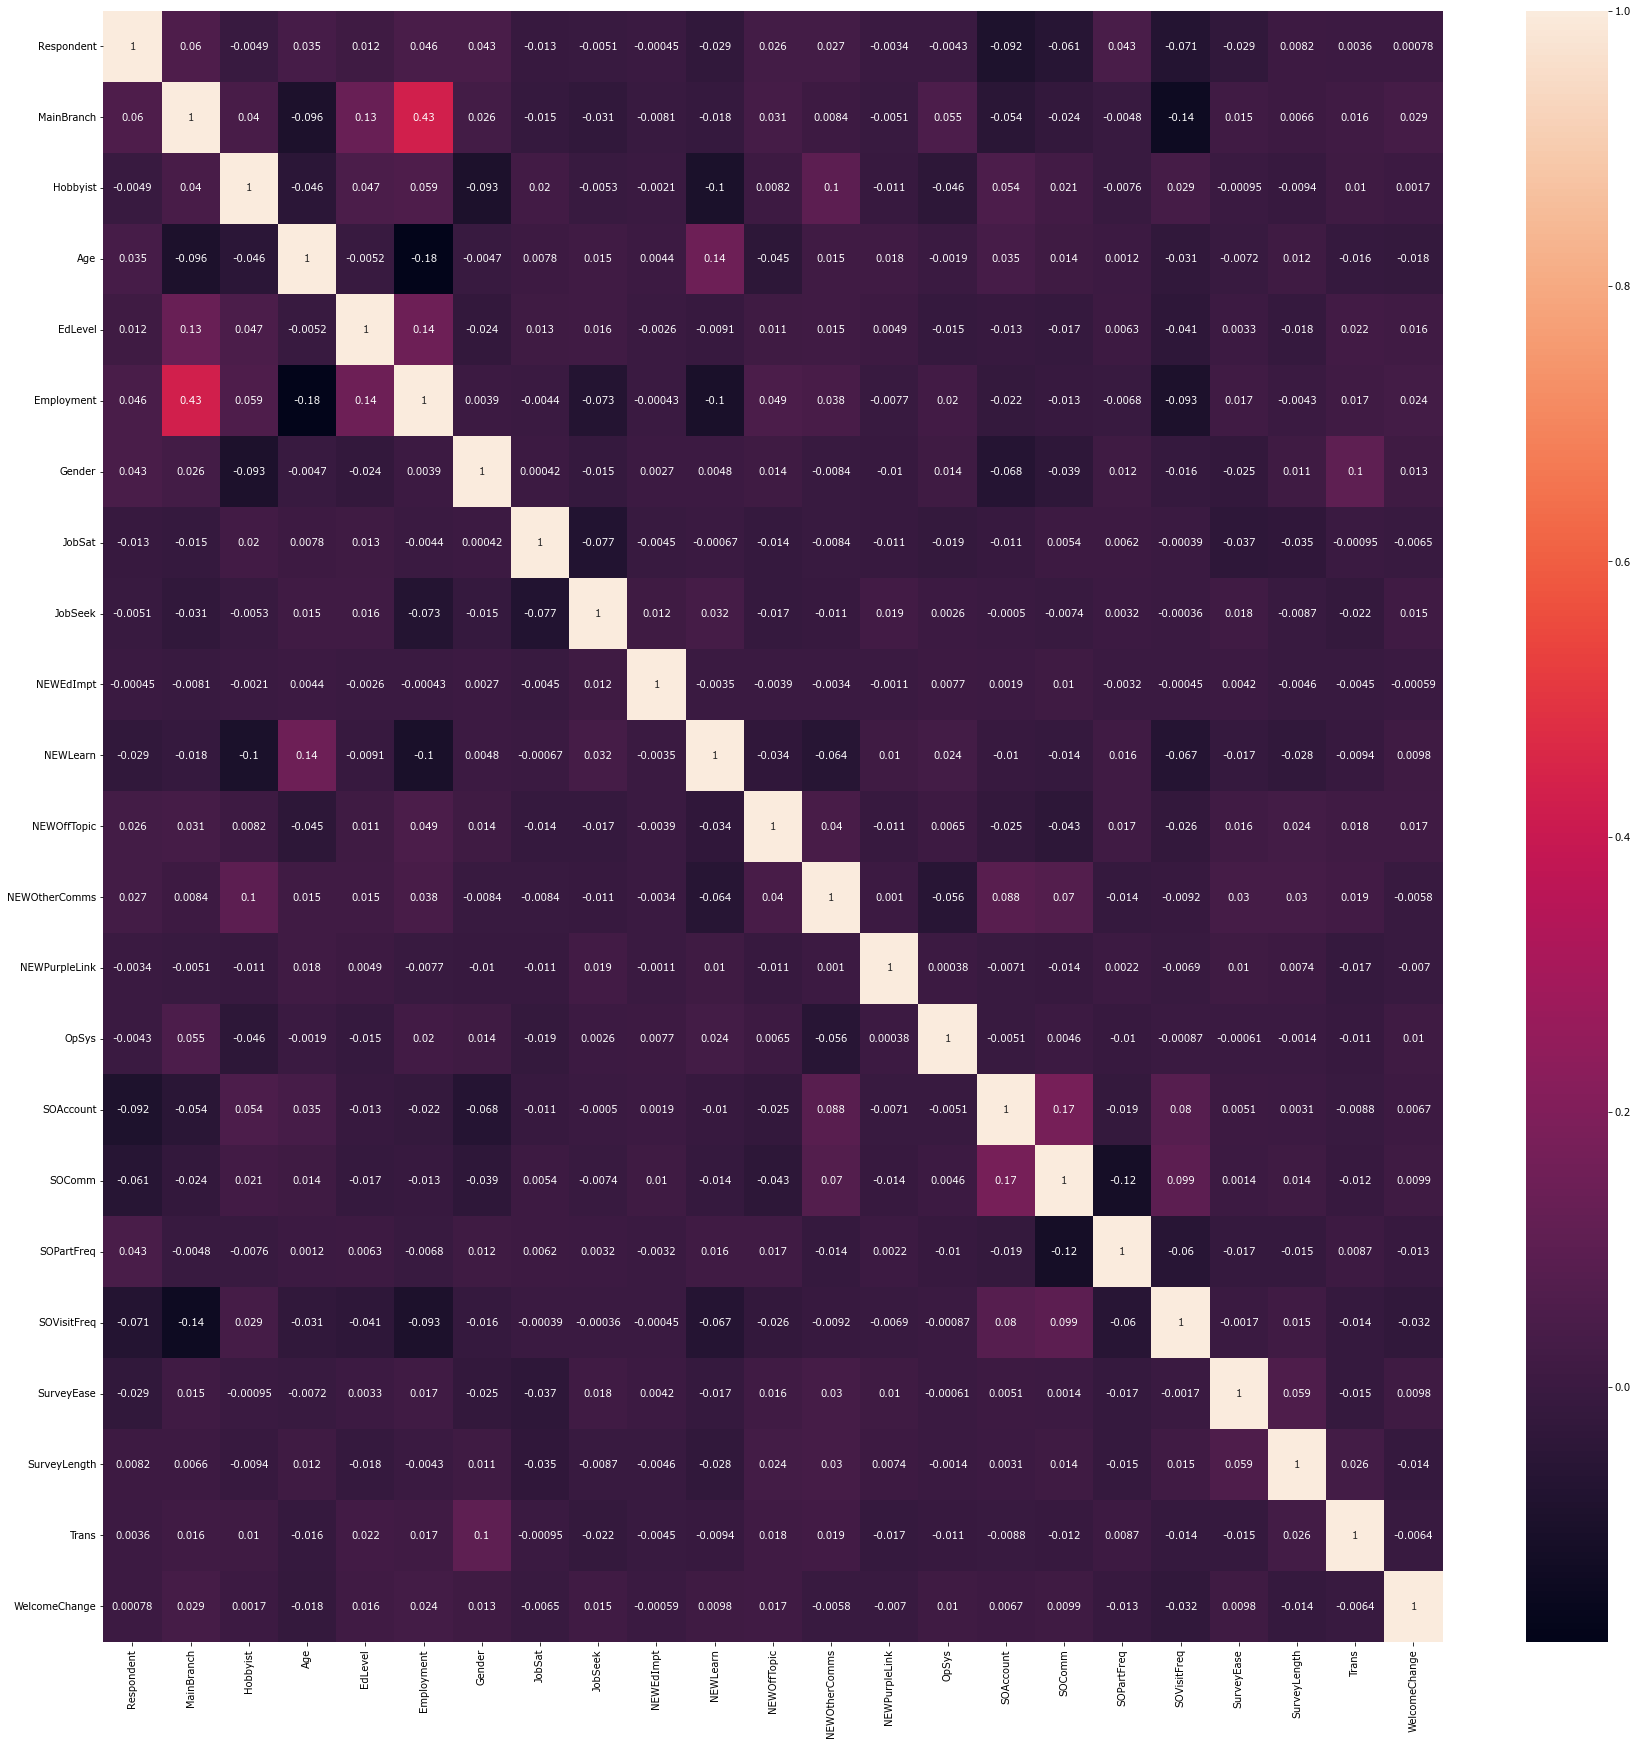

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(answer.corr(method='kendall'),annot=True)

##### easiest normalize for know is distribution normal or not is get logarithm of data so :

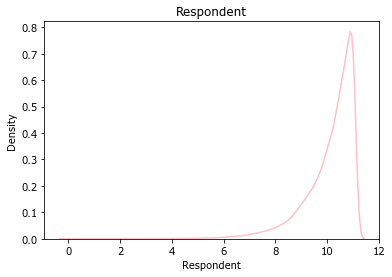

C:\Users\vai\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


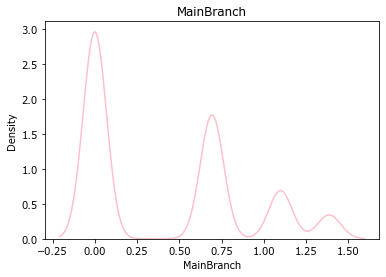

C:\Users\vai\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vai\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


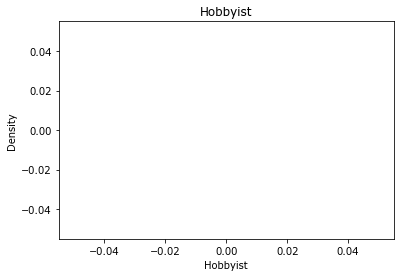

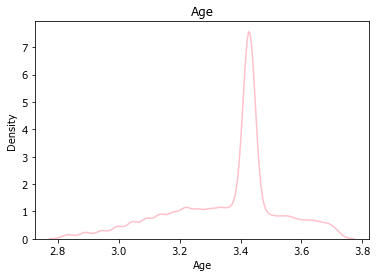

C:\Users\vai\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


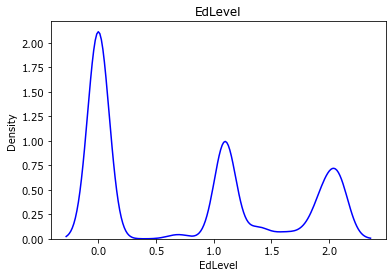

C:\Users\vai\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


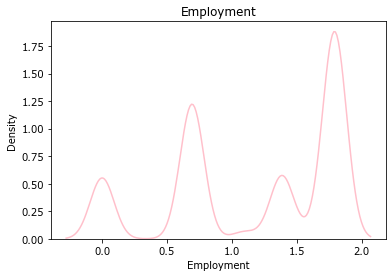

C:\Users\vai\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vai\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


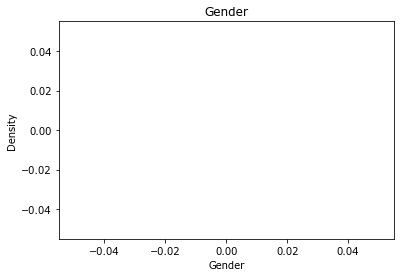

C:\Users\vai\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


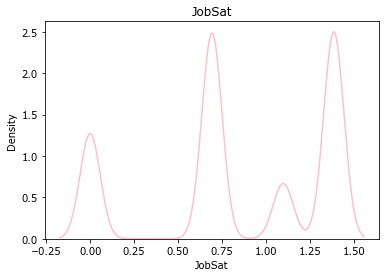

C:\Users\vai\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


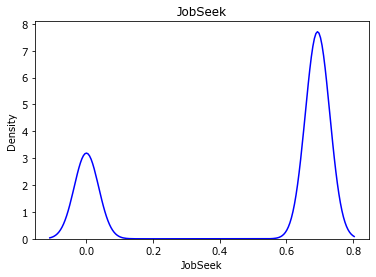

C:\Users\vai\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


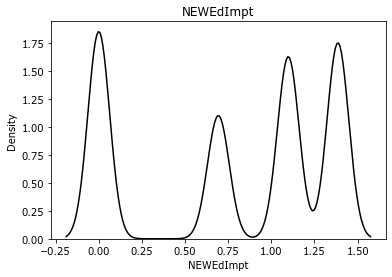

C:\Users\vai\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


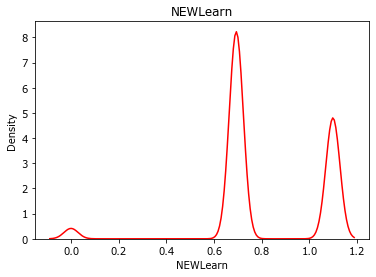

C:\Users\vai\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


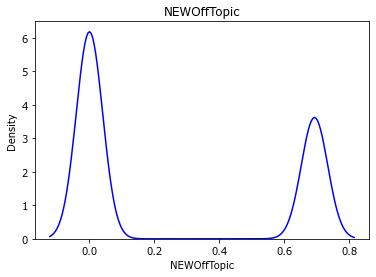

C:\Users\vai\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vai\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


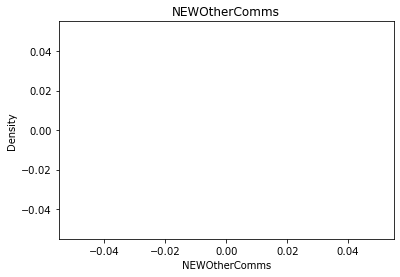

C:\Users\vai\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


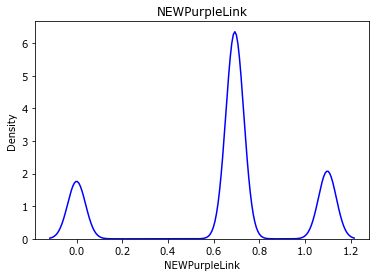

C:\Users\vai\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


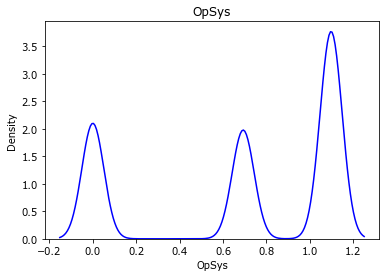

C:\Users\vai\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


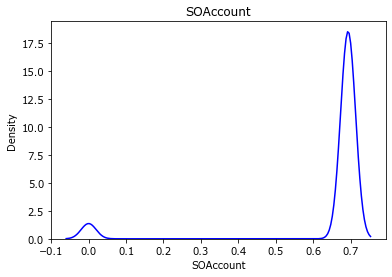

C:\Users\vai\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


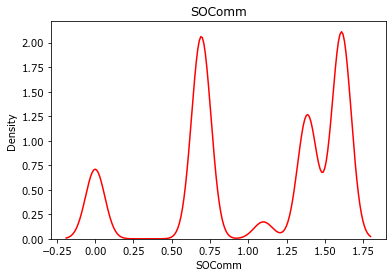

C:\Users\vai\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


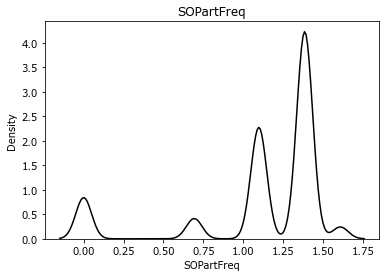

C:\Users\vai\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


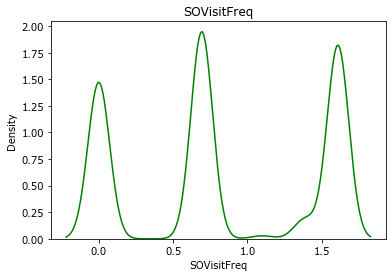

C:\Users\vai\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


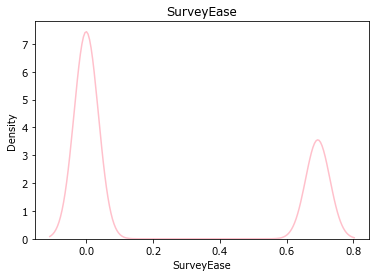

C:\Users\vai\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


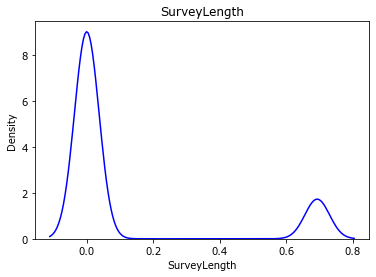

C:\Users\vai\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vai\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


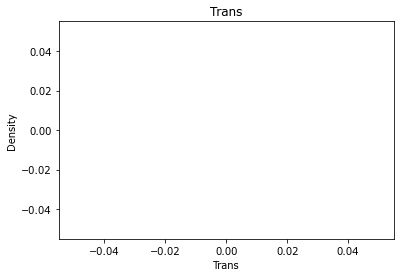

C:\Users\vai\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


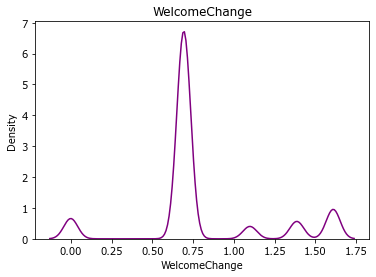

In [ ]:
for i in answer.drop(['DatabaseWorkedWith','DevType','Ethnicity','JobFactors',
                                        'LanguageDesireNextYear','LanguageWorkedWith',
'NEWCollabToolsDesireNextYear','NEWCollabToolsWorkedWith','NEWSOSites','NEWStuck','PlatformDesireNextYear',
'PlatformWorkedWith'],axis=1).columns:
    try:
        sns.kdeplot(np.log(answer[i]),color=choice(colors))
        plt.title(i)
        plt.show()
    except TypeError:
        continue

as we see some of features follow normal distributions

# PCA :

In [ ]:
for idx,i in enumerate(answer.columns):
    if i=='MainBranch' or i=='Country':
        print(idx)

1
5


In [ ]:
from sklearn.decomposition import PCA
# we can use kernel pca or pca or isomap this are the best for dimensionaly reduction
x_pca=answer[answer.columns[1:5]]
x_pca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58104 entries, 0 to 64460
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MainBranch  58104 non-null  float64
 1   Hobbyist    58104 non-null  float64
 2   Age         58104 non-null  float64
 3   Age1stCode  58104 non-null  object 
dtypes: float64(3), object(1)
memory usage: 2.2+ MB


In [ ]:
agecode=[]
for i in x_pca['Age1stCode']:
    try:
        agecode.append(float(i))
    except ValueError:
        agecode.append(float(0))
x_pca.drop('Age1stCode',axis=1,inplace=True)
x_pca['Age1stCode']=agecode

C:\Users\vai\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\vai\AppData\Local\Temp/ipykernel_5140/1993182850.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_pca['Age1stCode']=agecode


C:\Users\vai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

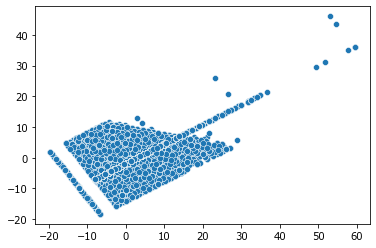

In [ ]:
pca=PCA(n_components=2)
ypca1=pca.fit_transform(x_pca)
sns.scatterplot(ypca1[:,0],ypca1[:,1])

# language groupby: 

In [ ]:
list_languages=[]
for i in (pd.unique(answer['LanguageWorkedWith'])):
    list_languages.extend(i.split(';'))
languages=list(set(list_languages))
del list_languages

In [ ]:
dict_data=dict(zip(languages,[[] for x in languages]))

In [ ]:
for lang in dict_data.keys():
    for person in answer['LanguageWorkedWith']:
        if lang in person:
            dict_data[lang].append(1)
        else:
            dict_data[lang].append(0)

In [ ]:
df=pd.DataFrame(dict_data).reset_index()

In [ ]:
df.head()

,index,HTML/CSS,TypeScript,VBA,C#,Ruby,Haskell,PHP,Perl,Objective-C,...,Bash/Shell/PowerShell,JavaScript,R,Java,Julia,Dart,Scala,C++,Swift,SQL
0,0,1,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2,2,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,3,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,4,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
df.drop('index',axis=1).sum(axis=0)

HTML/CSS                 36949
TypeScript               15124
VBA                       3287
C#                       17890
Ruby                      4061
Haskell                   1273
PHP                      15614
Perl                      1545
Objective-C               2366
Rust                      3009
C                        47417
Kotlin                    4629
Assembly                  3521
Go                        5197
Python                   25652
Bash/Shell/PowerShell    18482
JavaScript               39529
R                         9408
Java                     46706
Julia                      528
Dart                      2404
Scala                     2081
C++                      14092
Swift                     3367
SQL                      31609
dtype: int64

##### most common usage of programming language is C lang

In [ ]:
answer.groupby('Country').mean().reset_index()

,Country,Respondent,MainBranch,Hobbyist,Age,EdLevel,Employment,Gender,JobSat,JobSeek,...,NEWPurpleLink,OpSys,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,WelcomeChange
0,Afghanistan,37083.141176,0.741176,0.752941,29.320202,2.858824,1.835294,0.105882,1.941176,1.270588,...,1.305882,2.423529,1.541176,2.470588,3.082353,2.294118,1.388235,0.364706,0.011765,2.058824
1,Albania,34350.698113,0.528302,0.811321,28.811673,3.226415,1.188679,0.037736,2.169811,1.377358,...,1.735849,2.452830,1.622642,2.471698,2.716981,2.245283,1.320755,0.396226,0.018868,2.245283
2,Algeria,39022.463158,0.978947,0.726316,28.810919,3.631579,2.084211,0.115789,2.273684,1.200000,...,1.831579,2.105263,1.863158,3.031579,2.926316,2.210526,1.326316,0.336842,0.000000,2.536842
3,Andorra,44427.416667,1.083333,0.666667,31.195092,3.416667,0.833333,0.083333,1.666667,1.416667,...,1.916667,1.833333,1.416667,2.416667,2.666667,2.500000,1.166667,0.416667,0.000000,2.500000
4,Angola,42884.125000,1.125000,0.500000,29.500583,3.625000,2.875000,0.250000,1.500000,1.750000,...,2.125000,2.375000,2.000000,2.625000,2.750000,1.875000,1.375000,0.125000,0.000000,2.375000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,"Venezuela, Bolivarian Republic of...",37486.000000,0.515625,0.718750,27.057462,5.218750,1.656250,0.046875,1.921875,1.328125,...,1.937500,2.171875,1.703125,2.171875,2.796875,2.359375,1.265625,0.312500,0.000000,2.609375
179,Viet Nam,37337.326761,0.707042,0.887324,28.536593,3.476056,1.845070,0.070423,2.025352,1.278873,...,1.760563,2.312676,1.738028,2.853521,2.698592,2.481690,1.346479,0.369014,0.030986,2.312676
180,Yemen,48556.428571,0.428571,0.857143,30.881508,2.571429,1.000000,0.000000,3.142857,1.428571,...,1.000000,3.000000,1.142857,3.571429,3.142857,2.571429,1.285714,0.142857,0.000000,1.857143
181,Zambia,43752.950000,0.850000,0.700000,28.758761,2.600000,1.650000,0.050000,2.250000,1.250000,...,1.800000,2.750000,1.650000,2.800000,2.900000,2.250000,1.450000,0.300000,0.050000,1.900000


##### because we drop compy total we cant say this ,ergo it have many missing values

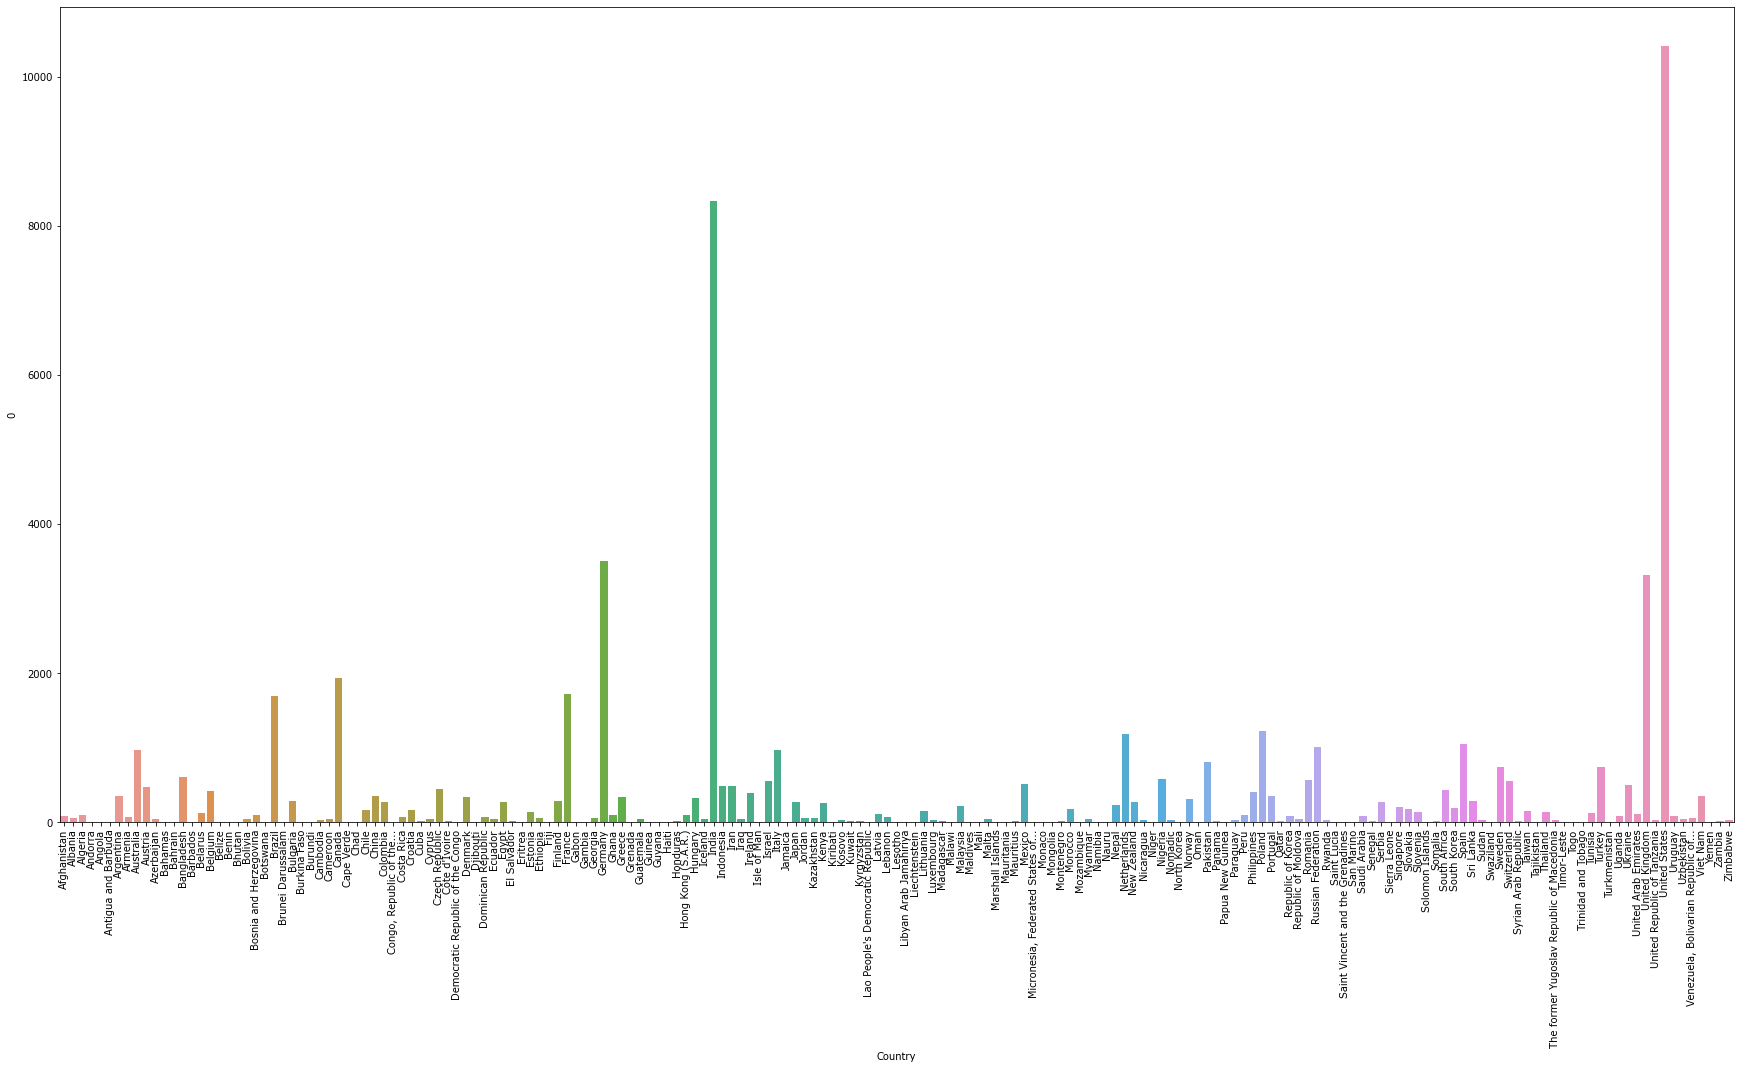

In [ ]:
plt.figure(figsize=(30,15))
g=sns.barplot(data=answer.groupby('Country').size().reset_index(),
           x='Country',y=0,errwidth=2)
g.tick_params(axis='x',rotation=90)

###### its indias